# EDA Bakery 

*Data Analyst*
- 1. Are there any null values or duplicated values? How will you wrangle/handle them?
- 2. Are there any variables that warrant transformations?
- 3. Do you notice any patterns or anomalies in the data? Can you plot them?

*Data Statistic*
- 1. Show Distribution of Total Price
- 2. Show the earliest customer buy every day
- 3. Total Quantity Sold
- 4. Total Price by Quantity * Unit Price
- 5. Top 4 Article by Quantity
- 6. Total Quantity Sold per Day
- 7. Total Customer per Day

*Machine Learning Forcast*
- 1. Forecast by Total Price per Day

*Data Visualization*

Will be showing in Power BI

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [209]:
df = pd.read_csv('Bakery sales.csv')
df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [210]:
df['index'] = df['Unnamed: 0']

In [211]:
df = df.drop(['Unnamed: 0'],axis=1)

# Check Null Values and Duplicated Values

In [212]:
df.duplicated().sum()

0

*There is no duplicated Value*

In [213]:
df.isnull().sum()

date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
index            0
dtype: int64

*There is no Null Values*

# Transform Unit Price and Date

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           234005 non-null  object 
 1   time           234005 non-null  object 
 2   ticket_number  234005 non-null  float64
 3   article        234005 non-null  object 
 4   Quantity       234005 non-null  float64
 5   unit_price     234005 non-null  object 
 6   index          234005 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [215]:
df['unit_price'] = df['unit_price'].replace({'\€':''}, regex = True)

In [216]:
df['unit_price'] = df['unit_price'].replace({',':'.'}, regex = True)

In [217]:
df['unit_price'] = df['unit_price'].astype(float)

In [218]:
df['date'] = df['date'].astype('datetime64[ns]')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  datetime64[ns]
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  float64       
 6   index          234005 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 12.5+ MB


# Pattern or Anomalies Data

In [220]:
import matplotlib.pyplot as plt
df_group = df.groupby('time')['Quantity'].sum().reset_index()
df_group

,time,Quantity
0,07:01,3.0
1,07:02,10.0
2,07:03,6.0
3,07:04,11.0
4,07:05,29.0
...,...,...
678,19:56,3.0
679,19:57,-1.0
680,19:58,1.0
681,20:00,2.0


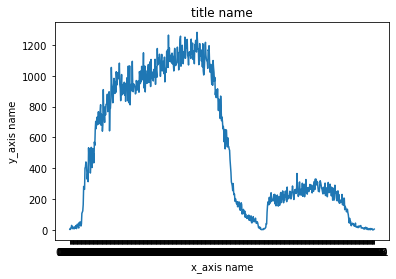

In [221]:
x_axis = df_group['time']
y_axis = df_group['Quantity']

plt.plot(x_axis, y_axis)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

In [222]:
df_group['Quantity'].max()

1283.0

In [223]:
df2=df_group.loc[(df_group['Quantity'] >1200)]
df2

,time,Quantity
221,10:42,1265.0
247,11:08,1237.0
248,11:09,1258.0
258,11:19,1252.0
262,11:23,1231.0
263,11:24,1237.0
272,11:33,1239.0
275,11:36,1213.0
280,11:41,1202.0
282,11:43,1231.0


Trend of Order Time is between **10.42 AM to 12.00 PM**. And Maximum order is **1283** in **11.46 AM**

# Data Analyst

# Distribution of total price

In [224]:
df['Total'] = df['Quantity']*df['unit_price']

In [225]:
df_group = df.groupby('date')['Total'].sum().reset_index()
df_group

,date,Total
0,2021-01-02,987.85
1,2021-01-03,1014.30
2,2021-01-04,461.90
3,2021-01-05,515.70
4,2021-01-07,544.00
...,...,...
595,2022-09-26,693.75
596,2022-09-27,746.45
597,2022-09-28,610.70
598,2022-09-29,689.20


C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

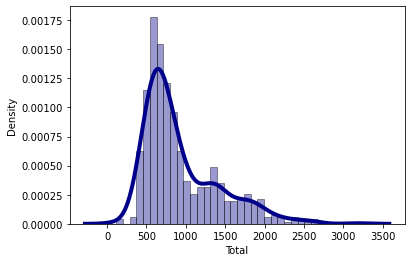

In [226]:
sns.distplot(df_group['Total'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Pendapatan yang paling sering didapatkan yaitu antara **500 hingga 1000** Euro

# Earliest Customer by Day

In [227]:
df_time = df.groupby('date')['time'].min().reset_index()

In [228]:
df_time['time'].min()

'07:01'

In [229]:
df_time['time'].max()

'16:14'

In [230]:
df_time.sort_values(by=['time'])

,date,time
182,2021-07-21,07:01
205,2021-08-13,07:02
210,2021-08-18,07:03
192,2021-07-31,07:04
195,2021-08-03,07:04
...,...,...
292,2021-11-08,08:54
31,2021-02-07,08:55
43,2021-02-21,08:57
341,2022-01-04,16:01


Pada data tersebut, dapat terlihat ada customer yang pertama kali membeli pada jam **16.01 dan 16.14**, untuk melihat detail maka akan ditampilkan data pada tanggal tersebut

In [231]:
df_time_1601 =df.loc[(df['date']=='2022-01-04')]
df_time_1601

,date,time,ticket_number,article,Quantity,unit_price,index,Total
132299,2022-01-04,16:01,227765.0,TRADITIONAL BAGUETTE,4.0,1.20,287672,4.80
132300,2022-01-04,16:05,227766.0,CAMPAGNE,1.0,1.80,287675,1.80
132301,2022-01-04,16:05,227766.0,COUPE,1.0,0.15,287676,0.15
132302,2022-01-04,16:06,227767.0,GAL POMME 4P,1.0,8.00,287679,8.00
132303,2022-01-04,16:07,227768.0,PAIN AU CHOCOLAT,1.0,1.20,287682,1.20
132304,2022-01-04,16:07,227769.0,SPECIAL BREAD,1.0,2.40,287685,2.40
132305,2022-01-04,16:13,227770.0,GAL POMME 6P,1.0,12.00,287688,12.00
132306,2022-01-04,16:14,227771.0,BOULE 400G,2.0,1.50,287691,3.00
132307,2022-01-04,16:14,227771.0,TRADITIONAL BAGUETTE,2.0,1.20,287692,2.40
132308,2022-01-04,16:14,227771.0,COUPE,2.0,0.15,287693,0.30


In [232]:
df_time_1614 =df.loc[(df['date']=='2021-09-22')]
df_time_1614

,date,time,ticket_number,article,Quantity,unit_price,index,Total
103305,2021-09-22,16:14,210578.0,KOUIGN AMANN,1.0,2.10,224409,2.10
103306,2021-09-22,16:14,210578.0,TRADITIONAL BAGUETTE,2.0,1.20,224410,2.40
103307,2021-09-22,16:18,210579.0,TRADITIONAL BAGUETTE,2.0,1.20,224413,2.40
103308,2021-09-22,16:27,210580.0,TRADITIONAL BAGUETTE,1.0,1.20,224416,1.20
103309,2021-09-22,16:37,210581.0,TRAITEUR,1.0,6.50,224419,6.50
103310,2021-09-22,16:37,210581.0,SUCETTE,1.0,0.30,224420,0.30
103311,2021-09-22,16:37,210581.0,TRADITIONAL BAGUETTE,1.0,1.20,224421,1.20
103312,2021-09-22,16:45,210582.0,QUIM BREAD,1.0,1.00,224424,1.00
103313,2021-09-22,16:45,210582.0,PT NANTAIS,1.0,3.00,224425,3.00
103314,2021-09-22,16:45,210582.0,TRADITIONAL BAGUETTE,3.0,1.20,224426,3.60


- Pada tanggal 22 September memperingati **Centenarian's Day** kemungkinan si pemilik berkunjung ke panti jompo sehingga membuka toko lebih sore

- Pada tanggal 4 January memperingati **World Braille Day**, kemungkinan si pemilik melakukan charity ke Panti Asuhan

# Total Quantity and Total Price

In [233]:
df['Quantity'].sum()

359988.0

Total roti terjual sampai saat ini mencapai **359.988 buah**

In [235]:
df['Total'].sum()

558640.8500000001

Total pendapatan sampai saat ini mencapai **558,640.85 Euro** yaitu setara dengan **9 Miliar Rupiah**

# Top 4 Menu by Quantity Order

In [243]:
df_art = df.groupby('article')['Quantity'].sum().reset_index()

In [249]:
df_art.sort_values(['Quantity'], ascending=False)

,article,Quantity
140,TRADITIONAL BAGUETTE,117463.0
32,CROISSANT,29654.0
85,PAIN AU CHOCOLAT,25236.0
31,COUPE,23505.0
7,BANETTE,22732.0
...,...,...
91,PAIN NOIR,1.0
3,ARTICLE 295,1.0
112,REDUCTION SUCREES 24,1.0
45,DOUCEUR D HIVER,1.0


In [254]:
df_art= df_art.loc[(df_art['Quantity']>=22732) & (df_art['Quantity']<=117463) ]
df_art

,article,Quantity
31,COUPE,23505.0
32,CROISSANT,29654.0
85,PAIN AU CHOCOLAT,25236.0
140,TRADITIONAL BAGUETTE,117463.0


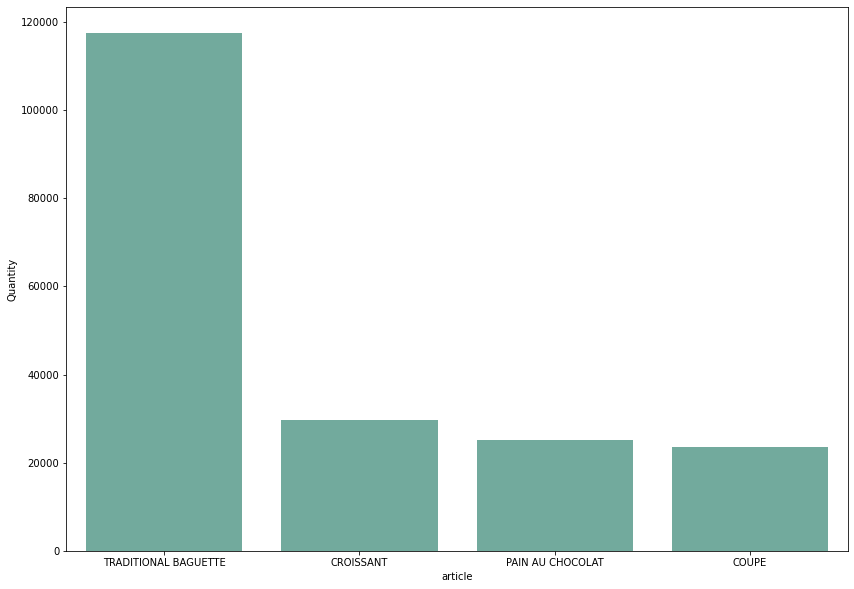

In [256]:
plt.figure(figsize=(14, 10))

# Reorder this data frame
df_art = df_art.sort_values(['Quantity'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="article", 
    y="Quantity", 
    data=df_art, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

Pada bar Chart ditunjukkan bahwa **Traditional Baguette** adalah Menu yang paling laku

# Quantity Sold by Day

In [259]:
df_quant_day = df.groupby('date')['Quantity'].sum().reset_index()
df_quant_day

,date,Quantity
0,2021-01-02,581.0
1,2021-01-03,564.0
2,2021-01-04,315.0
3,2021-01-05,309.0
4,2021-01-07,310.0
...,...,...
595,2022-09-26,399.0
596,2022-09-27,423.0
597,2022-09-28,357.0
598,2022-09-29,428.0


C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

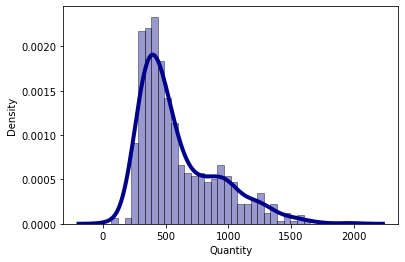

In [260]:
sns.distplot(df_quant_day['Quantity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Toko Roti tersebut rata-rata menjual **500** roti perhari

# Customer per Day

In [263]:
df_cust = df.groupby('date')['Total'].count().reset_index()
df_cust

,date,Total
0,2021-01-02,365
1,2021-01-03,375
2,2021-01-04,210
3,2021-01-05,235
4,2021-01-07,215
...,...,...
595,2022-09-26,295
596,2022-09-27,325
597,2022-09-28,278
598,2022-09-29,303


C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

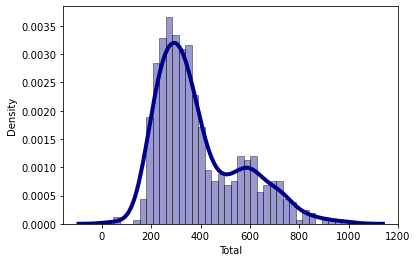

In [268]:
sns.distplot(df_cust['Total'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata Customer yang harus dilayani perhari adalah **200-400 customer**

# Preparation for Forecasting Data

In [269]:
df['date'] = pd.to_datetime(df['date'])

In [270]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

In [271]:
df = df[['date','unit_price','Quantity']]

In [272]:
df['total']= df['Quantity']*df['unit_price']

C:\Users\MrBento\AppData\Local\Temp\ipykernel_12200\947052907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total']= df['Quantity']*df['unit_price']


In [273]:
df['ds'] = df['date']
df['y'] = df['total']

C:\Users\MrBento\AppData\Local\Temp\ipykernel_12200\3017225593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = df['date']
C:\Users\MrBento\AppData\Local\Temp\ipykernel_12200\3017225593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['total']


In [274]:
df.drop(['date','unit_price','Quantity', 'total'], axis=1)

,ds,y
0,2021-06-12,200.0
1,2021-10-31,66.0
2,2022-07-23,65.0
3,2021-11-08,38.7
4,2021-08-22,27.5
...,...,...
234000,2021-05-23,-13.2
234001,2021-05-23,-15.6
234002,2021-10-15,-18.7
234003,2021-10-15,-21.6


In [276]:
df.groupby('ds')[['y']].sum()
df2 = df.groupby(['ds'])['y'].sum().reset_index()

In [277]:
df2

,ds,y
0,2021-01-02,987.85
1,2021-01-03,1014.30
2,2021-01-04,461.90
3,2021-01-05,515.70
4,2021-01-07,544.00
...,...,...
595,2022-09-26,693.75
596,2022-09-27,746.45
597,2022-09-28,610.70
598,2022-09-29,689.20


# Forecast Total Price

In [278]:
from prophet import Prophet

In [279]:
pre = Prophet()

16:23:52 - cmdstanpy - INFO - Chain [1] start processing
16:23:52 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Prophet Model Forecasts on Bakery')

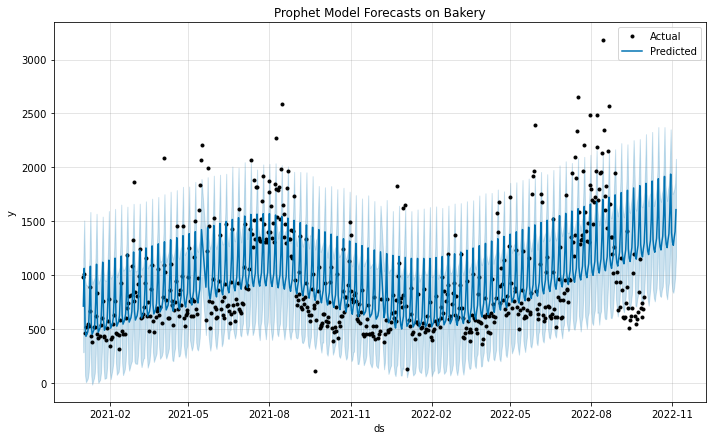

In [280]:
pre.fit(df2)
future = pre.make_future_dataframe(periods=36)

forecast = pre.predict(future)

pre.plot(forecast)
plt.legend(['Actual','Predicted'])
plt.title("Prophet Model Forecasts on Bakery")

# Kesimpulan

Kesimpulan dari **EDA Bakery Data** diatas adalah:
- 1. Customer yang harus dilayani perhari adalah **200 - 400 Customer** dengan rata-rata produk yang dibeli sekitar **500 buah**
- 2. Rata-rata pembeli pertama datang pada pukul **07.00 - 08.00**, sementara itu ada hari dimana toko buka pada sore hari yaitu pada tanggal 4 January 2022 dan 22 September 2021.
- 3. Pendapatan perhari dari toko tersebut sekitar **500 - 1000 Euro** yaitu setara **8-16 Juta Rupiah**
- 4. Total Roti yang terjual hingga saat ini adalah **359.888 buah** dengan pendapatan sekitar **9 Miliar Rupiah**
- 5. Menu yang paling banyak terjual adalah **Traditional Baguette**
- 6. Berdasarkan forecast diatas, estimasi pendapatan pada bulan 11 tahun 2022 akan **meningkat**